# Customer Segmentation Using K-Means

# Introduction 

There are  3 methods ın clustering these are K-Means, PAM and Hierarchical clustering methods.In this project we will use k-means. K-means is one of the unsupervised machinelearning algorithim which we try to  find  find groups of observations that share similar characteristics. In thıs project firstly we look the maths behind the k clustiring after that we use a data set to find smilar groups and we can make comments regarding our data for example  after the segmentation of customers we can decide our market strategy and take actions according to data.

## Clustering


  "In machine learning , we often group examples as a first step to understand a subject (data set) in a machine learning system. Grouping unlabeled examples is called clustering.As the examples are unlabeled, clustering relies on unsupervised machine learning. If the examples are labeled, then clustering becomes classification." 
Clustering has a myriad of uses in a variety of industries. Some common applications for clustering include the following:

1.market segmentation

2.social network analysis

3.search result grouping

4.medical imaging

5.image segmentation

6.anomaly detection
https://developers.google.com/machine-learning/clustering/overview?hl=ru

# Data Exploratory Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\B.KURT\\Desktop\\usl\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In here before the start we are checking  data. Is there any missing values?

In [4]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Inside of the data there is no missing values. so we will look data's inside now. what can kind of inference we make?

We will use seaborn library to understood our data.

Text(0.5, 1.0, ' Gender')

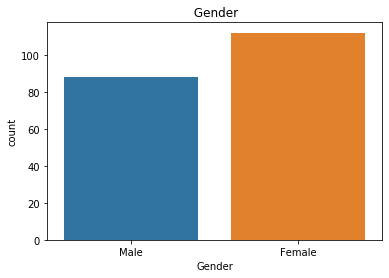

In [6]:
sns.countplot(x='Gender', data=df)

plt.title(' Gender')

As we see above females are more than man's. Therefore  we can say females purchase more.But thats not enough to make implement.

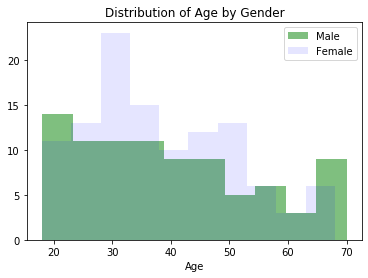

In [7]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, color='g', label='Male')
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.1, color='b',label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

It seems that womans are younger than mans, plus and also  difference between max and min age is a more less. 

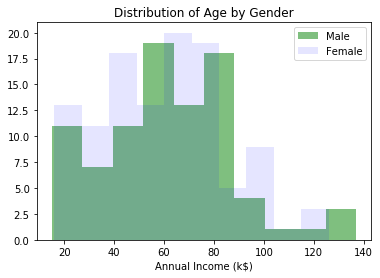

In [8]:
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, color='g', label='Male')
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.1, color='b',label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Annual Income (k$)')
plt.legend()

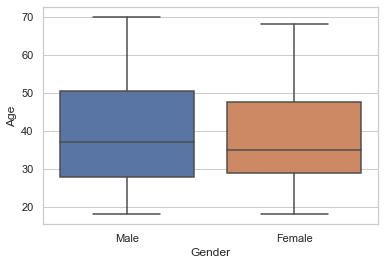

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Age", data=df)

Actually we can say there is an outlier 2 mans have extreme income.Now we should find a corellation among the datas so in here we use heat map.

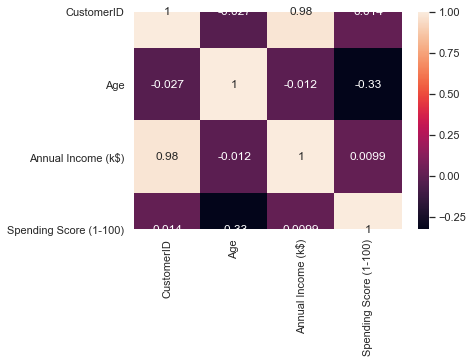

In [10]:
sns.heatmap(df.corr(), annot=True)


There is a negative correlation betweens age and spending score and also we can say  there is a certain correlation between spending score and annual income.So we consider  those two variables: annual income and spending score and we draw a scatter plot for the first insight before the using k-means methods.

Text(0.5, 1.0, 'Annual Income to Spending Score')

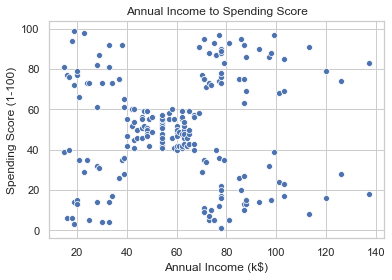

In [11]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df)
plt.title('Annual Income to Spending Score')

# K-Means

"K-means algorithm can be summarized as follow:

1.Specify the number of clusters (K) to be created (by the analyst)
2.Select randomly k objects from the dataset as the initial cluster centers or means
3.Assigns each observation to their closest centroid, based on the Euclidean distance between the object and the centroid
4.For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster. The centoid of a Kth cluster is a vector of length p containing the means of all variables for the observations in the kth cluster; p is the number of variables.
5.Iteratively minimize the total within sum of square. That is, iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached. " (https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/)

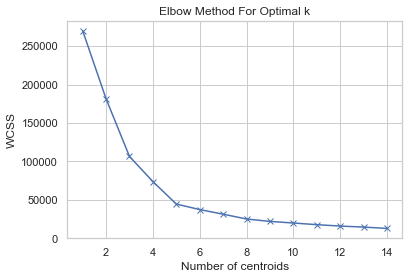

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df.iloc[:,[3,4]])
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

ın the above we decide number of cluster using elbow method Since the within-cluster variance (WCSS) start plateauing from the 5th cluster, we will set k=4.

Text(0, 0.5, 'Spending Score (1-100)')

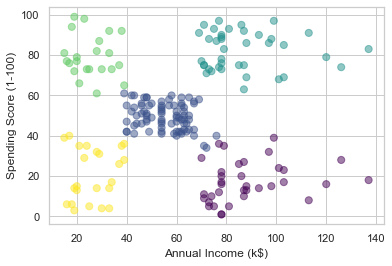

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df.iloc[:,[3,4]])
y_kmeans = kmeans.predict(df.iloc[:,[3,4]])

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score ')

# Conclusion

We didnt perform any Principal Component Analysis (PCA) thats why we take 2 variables in this project we just show the how we clustering using k-means algorithm. According the last graph we can observe that there are 5 cluster in our data. These are;

Lightgreen:Low income spending high.

Yellow:Low income low spending.

Darkblue:Medium income medium spending.

Seablue:High income high spending.

Purple:High income low spending.

We cluster our customer using k-means algorithm and we can interprate their according their cluster. As a data scientist we can give a suggestion for example owner of the market can provide a bonus card system for who has spending high but has low asset, with this system we keep our customer. Also who has a high asset but spending low, we can provide them new campaign for spending their money in the market.  


# References

1) https://realpython.com/k-means-clustering-python/ 

2) https://developers.google.com/machine-learning/clustering/overview?hl=ru 

3) https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

4) https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/

5) https://seaborn.pydata.org/generated/seaborn.heatmap.html


Muhammed Burhan KURT - 428168